## Are sightings more common at certain times of day or in the year?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load needed data and drop unneeded "Unnamed: 0" column
sighting_data_frame = pd.read_csv("output/clean_data.csv")
display(sighting_data_frame.head())

,city,state,year,month,day,hour,minute,converted_timestamp,shape
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,light
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,circle
2,Peoria,NY,2009,3,15,18,0,2009-03-15 18:00:00,cigar
3,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,disk
4,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,circle


In [3]:
# Bin hours into day parts
bins = [0,4,8,12,16,20,24]
group_names = ['12AM-4AM','4AM-8AM','8AM-12PM','12PM-4PM','4PM-8PM','8PM-12AM']
sighting_data_frame['day parts'] = pd.cut(sighting_data_frame['hour'],
                             bins, labels=group_names,
                             include_lowest = True)
sighting_data_frame.head()

,city,state,year,month,day,hour,minute,converted_timestamp,shape,day parts
0,Chester,VA,2019,12,12,18,43,2019-12-12 18:43:00,light,4PM-8PM
1,Rocky Hill,CT,2019,3,22,18,30,2019-03-22 18:30:00,circle,4PM-8PM
2,Peoria,NY,2009,3,15,18,0,2009-03-15 18:00:00,cigar,4PM-8PM
3,Kirbyville,TX,2019,4,2,20,25,2019-04-02 20:25:00,disk,4PM-8PM
4,Gold Canyon,AZ,2019,4,10,17,0,2019-04-10 17:00:00,circle,4PM-8PM


In [4]:
# Create a new dataframe with the two columns we'll be using to answer our question
sighting_freq = sighting_data_frame[["month","hour"]]

In [5]:
# Create a new column to store the month names mapped onto the "month" column
sighting_freq["Month Name"] = sighting_freq["month"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
sighting_freq = sighting_freq.sort_values("month").reset_index(drop=True)
sighting_freq.head()

,month,hour,Month Name
0,1,3,January
1,1,18,January
2,1,17,January
3,1,22,January
4,1,20,January


In [6]:
# Create a new dataframe for just the data related to sightings per month

# Get the number of sightings per month
monthdf = pd.DataFrame(sighting_freq["Month Name"].value_counts()).reset_index()
monthdf = monthdf.rename(columns={monthdf.columns[0]:"Month Name", monthdf.columns[1]:"count"})
monthdf.head()

# Use pd.merge() to merge monthdf with sighting_freq, keep only the columns related to sightings per month
monthfinal = pd.merge(monthdf, sighting_freq, how="left", on="Month Name")
monthfinal = monthfinal.drop("hour",axis=1)
monthfinal = monthfinal.drop_duplicates()
monthfinal = monthfinal.sort_values(by="month")
monthfinal.head()

,Month Name,count,month
53365,January,4779,1
67288,February,3725,2
62814,March,4474,3
58144,April,4670,4
48507,May,4858,5


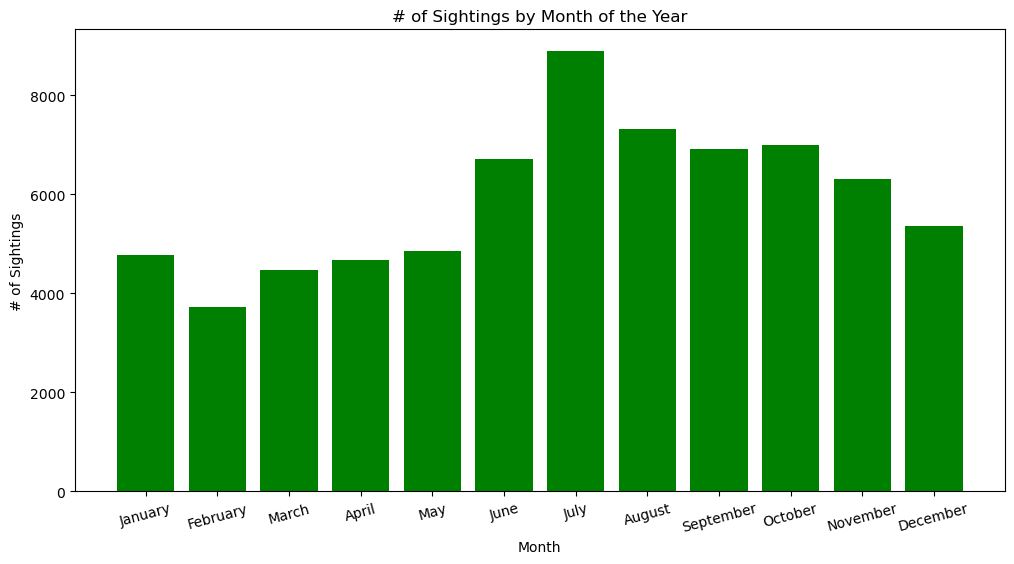

In [7]:
# Create a bar chart to show number of sightings by month of the year
plt.figure(figsize=(12,6))
monthplot = plt.bar(monthfinal["Month Name"], monthfinal["count"], color = "g")
plt.title("# of Sightings by Month of the Year")
plt.xlabel("Month")
plt.ylabel("# of Sightings")
plt.xticks(rotation = 15)
plt.savefig("visuals/sightings_per_month_bar.png")
plt.show()

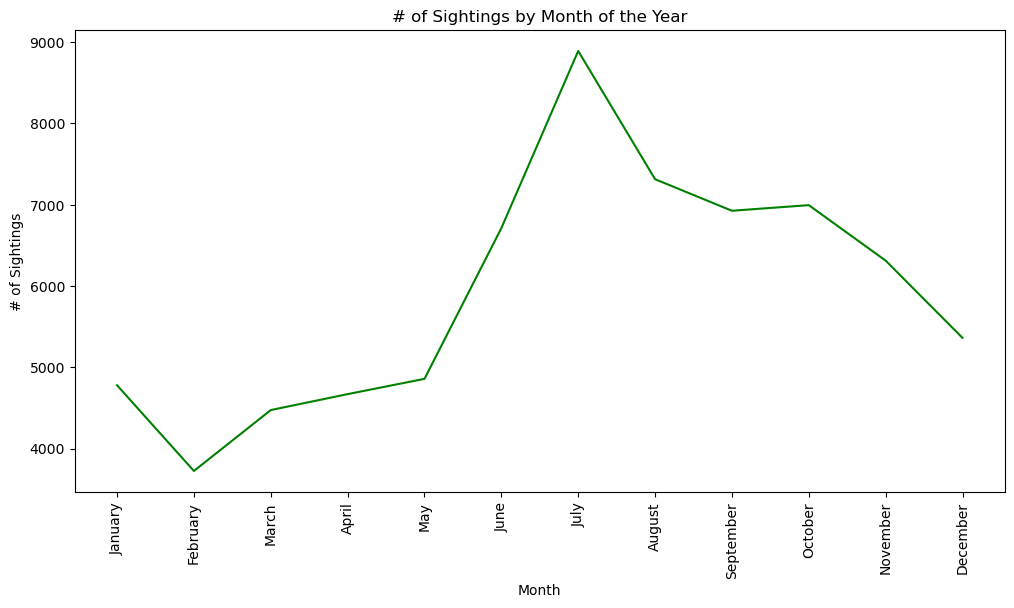

In [8]:
# Create a line chart to show number of sightings by month of the year
plt.figure(figsize=(12,6))
plt.plot(monthfinal["Month Name"],monthfinal["count"], color = 'g')
plt.title("# of Sightings by Month of the Year")
plt.xlabel("Month")
plt.ylabel("# of Sightings")
plt.xticks(rotation = 90)
plt.savefig("visuals/sightings_per_month_line.png")
plt.show()

In [9]:
# Create a new dataframe for just the data related to sightings by hour of the day
hourdf = pd.DataFrame(sighting_freq["hour"].value_counts()).reset_index()
hourdf = hourdf.rename(columns={hourdf.columns[0]:"hour", hourdf.columns[1]:"count"})
hourdf = hourdf.sort_values("hour").reset_index(drop=True)
display(hourdf.head())

,hour,count
0,0,4180
1,1,2587
2,2,1679
3,3,1592
4,4,1290


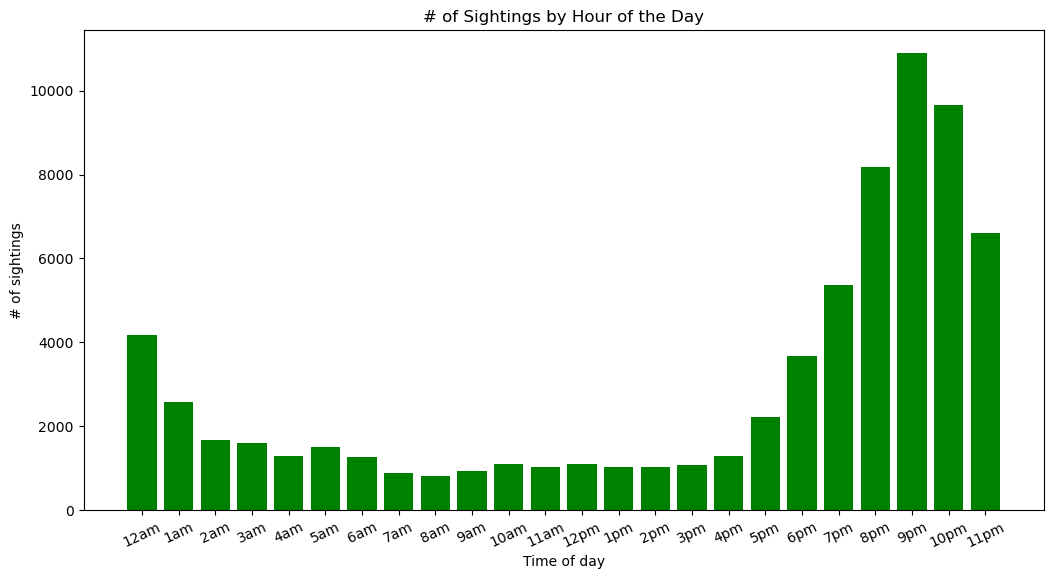

In [10]:
# Create a bar chart to show the number of sightings by the hour of day they occured
fig = plt.figure(figsize=(12,6))
ax= fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.bar(hourdf["hour"].unique(),hourdf["count"], color = "g")
plt.title("# of Sightings by Hour of the Day")
plt.xlabel("Time of day")
plt.ylabel("# of sightings")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
ax.set_xticklabels(["12am","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"])
plt.xticks(rotation=25)
plt.savefig("visuals/sightings_per_hour_bar.png")
plt.show()

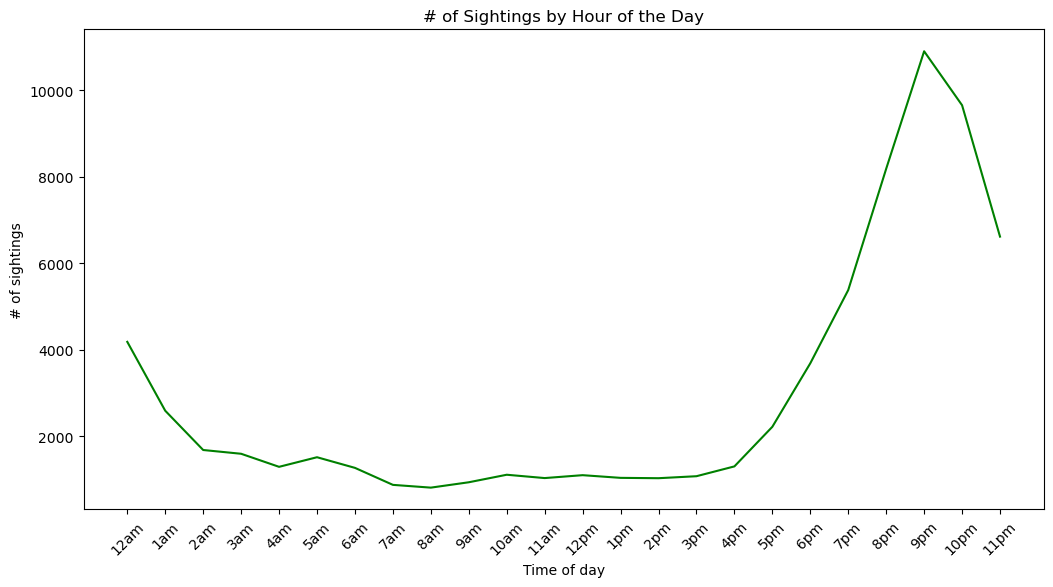

In [11]:
# Create a line chart to show the number of sightings by the hour of day they occured
fig = plt.figure(figsize=(12,6))
ax= fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot(hourdf["hour"].unique(),hourdf["count"], color = 'g')
plt.title("# of Sightings by Hour of the Day")
plt.xlabel("Time of day")
plt.ylabel("# of sightings")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
ax.set_xticklabels(["12am","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"])
plt.xticks(rotation=45)
plt.savefig("visuals/sightings_per_hour_line.png")
plt.show()

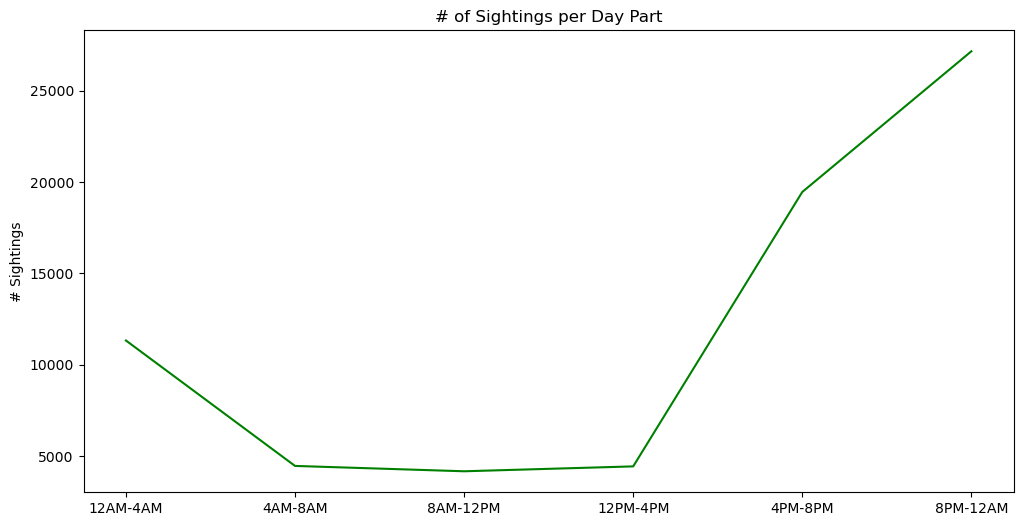

In [12]:
# Count sightings per day part and plot
sighting_data_frame['day parts'].value_counts().sort_index().plot(kind='line', color='green',
                                                   ylabel='# Sightings',
                                                   title='# of Sightings per Day Part',
                                                   figsize=(12,6))
plt.savefig("visuals/sightings_per_daypart_line.png")

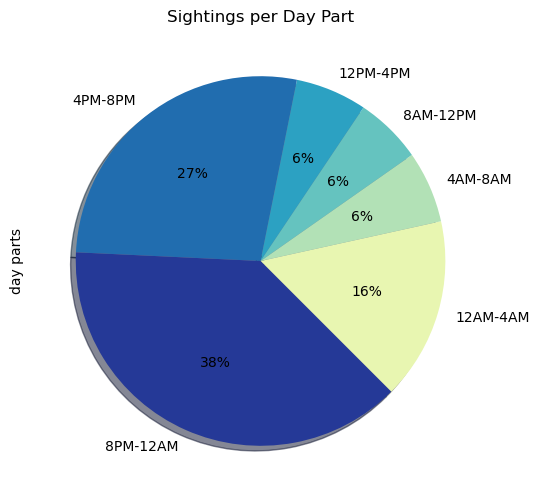

In [13]:
# Count sightings per day part and plot
sighting_data_frame['day parts'].value_counts().sort_index().plot(kind='pie',
                                                        autopct='%1.0f%%',
                                                        shadow=True,
                                                        title='Sightings per Day Part',
                                                        colors=sns.color_palette('YlGnBu'),
                                                        startangle=-45,
                                                        figsize=(12,6))
plt.savefig("visuals/sightings_per_daypart_pie.png")